In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


2016-08-23


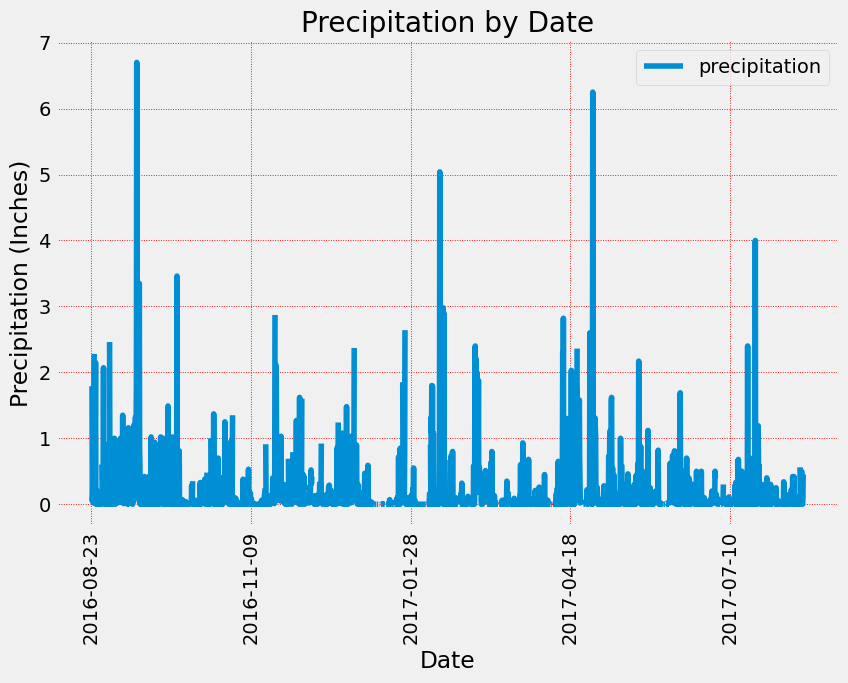

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
one_year_past = most_recent_date - dt.timedelta(days=365)
print(one_year_past)

# Perform a query to retrieve the data and precipitation scores
info_all = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_past).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_date_df = pd.DataFrame(info_all, columns=['date', 'precipitation'])
better_index = precip_date_df.set_index("date")

# Sort the dataframe by date
best_index = better_index.sort_values(by="date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
best_index.plot.line(figsize = (9,6), rot=90)

plt.grid(color = 'red', linestyle = ':', linewidth = .66)
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = precip_date_df.describe()
summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()    

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = [func.min(measurement.tobs),
          func.max(measurement.tobs),
          func.avg(measurement.tobs)]

active_results = session.query(*active).filter(measurement.station == 'USC00519281').all()
active_results

[(54.0, 85.0, 71.66378066378067)]

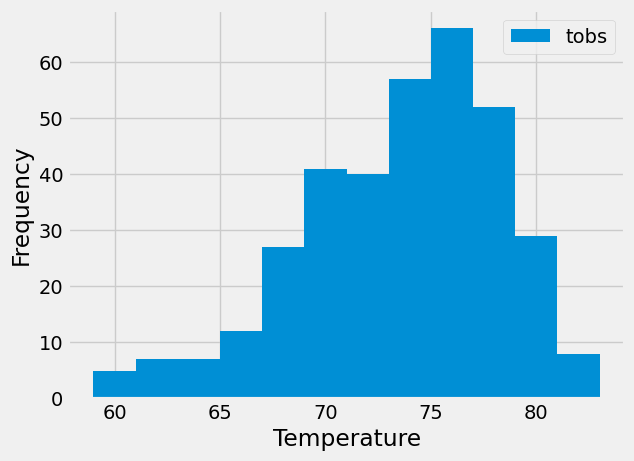

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_measurement_query = session.query(measurement.tobs).\
        filter(measurement.station == 'USC00519281', \
               measurement.date > one_year_past).all()

tobs_df = pd.DataFrame(tobs_measurement_query, columns=["Temperature"])
tobs_df.head()

temperatures = tobs_df["Temperature"]

plt.hist(temperatures,bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

# Close Session

In [16]:
# Close Session
session.close()